### Model analysis

In [10]:
# Import all necessary libraries
import os
import sys
from pathlib import Path
import pandas as pd
import joblib
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.svm import SVR

# Import the codebase from functions.py
from functions import load_data, BaselineRegressor, FeatureSelectionRegressor, TuningRegressor, data_preprocessing

# Set the root directory of the project to the parent folder of the current working directory
PROJECT_ROOT = Path.cwd().parent  

# Add the 'src' directory (under the project root) to the Python module search path
sys.path.append(str(PROJECT_ROOT / "src"))

# Also add the '../src' directory relative to the current file's location, in case it's being run from another context
sys.path.append(os.path.abspath("../src"))

#### Dataset loading and preparation

- We load the training and evaluation datasets using the `load_data` function that splits the dataset in *X* (features) and *y* (target).

In [3]:
X,y = load_data("../data/development_final_data.csv")
eval_X, eval_y = load_data("../data/evaluation_final_data.csv")

#### Model Training, Evaluation, and Selection Pipeline

1. **Define Model and Regressor Classes**
- The `model_classes` holds each one of the regression models - Elastic Net, SVR, BayesianRidge - and their string identifiers.
- The `regressor_classes` defines the stages of the modeling pipeline: baseline, feature selection, and hyperparameter tuning.
2. **Loop over each model type**
- For each regression algorithm, we initialize a loop to evaluate its performance across the three training stages.
3. **Train and evaluate each regressor**
- For each regressor stage (baseline, feature selection, tuning), we instantiate the model with training and evaluation data.
- We train the model using `.train()`.
- We evaluate it using `.evaluate()` and collect performance metrics (RMSE, MAE, R²).
- We save the trained model using `.save()`.
All results are stored in a dictionary called `stage_results`.
4. **Select the best stage for each model**
- The best stage is the one with the lowest mean RMSE.
- We save this model again under the folder `final_models` with a specific name format: `<model_name>_<best_stage>_best`.
5. **Store best models summary**
- A summary dictionary `best_models` keeps track of the best model and its evaluation metrics for each algorithm.
6. **Identify the Overall Winner**
- From the best models of each algorithm, the one with the lowest RMSE is selected as the overall winner.
- This final model is renamed `"winner"` and saved to the `final_models` directory.

For elastic_net baseline:
Evaluation Summary (50 Repeats)
RMSE
  Mean:   3.935
  Median: 3.850
  95% CI: (3.025, 4.903)
MAE
  Mean:   2.854
  Median: 2.917
  95% CI: (2.268, 3.409)
R² Score
  Mean:   -0.007
  Median: 0.004
  95% CI: (-0.093, 0.081)


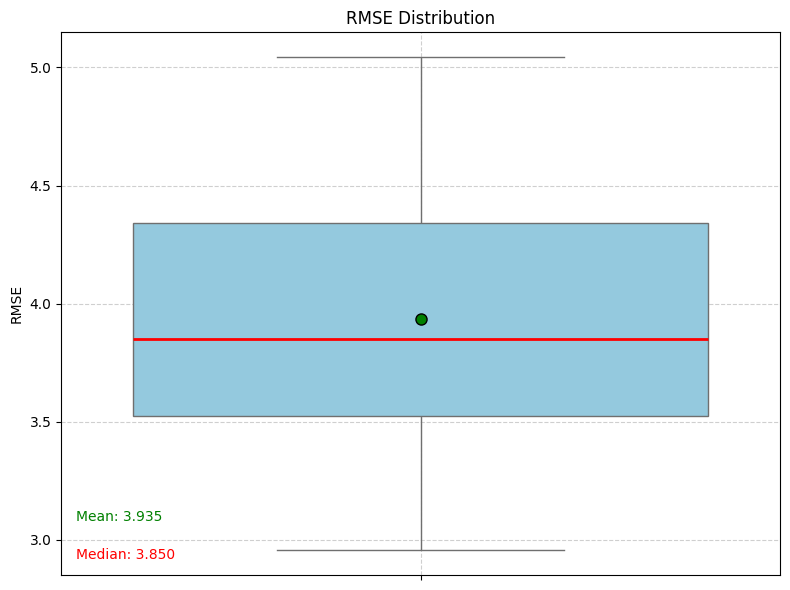

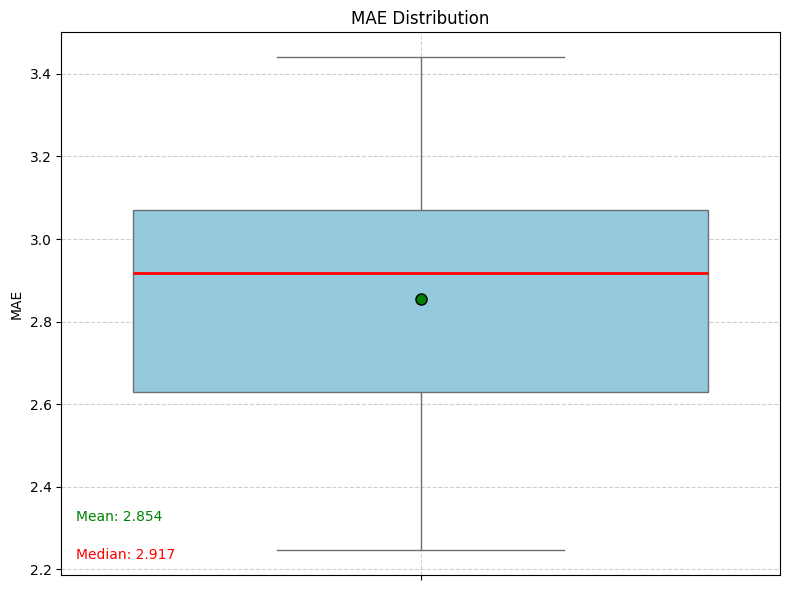

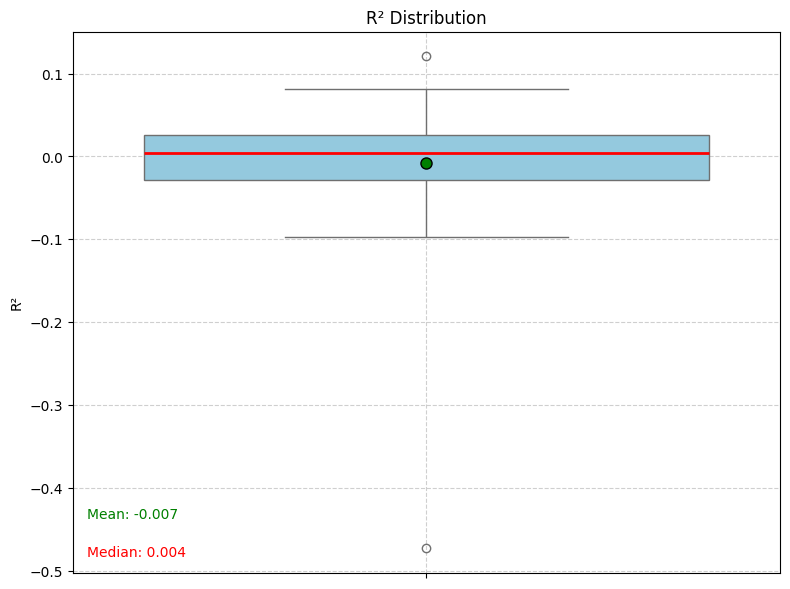

For elastic_net feature_selection:
Evaluation Summary (50 Repeats)
RMSE
  Mean:   3.935
  Median: 3.850
  95% CI: (3.025, 4.903)
MAE
  Mean:   2.854
  Median: 2.917
  95% CI: (2.268, 3.409)
R² Score
  Mean:   -0.007
  Median: 0.004
  95% CI: (-0.093, 0.081)


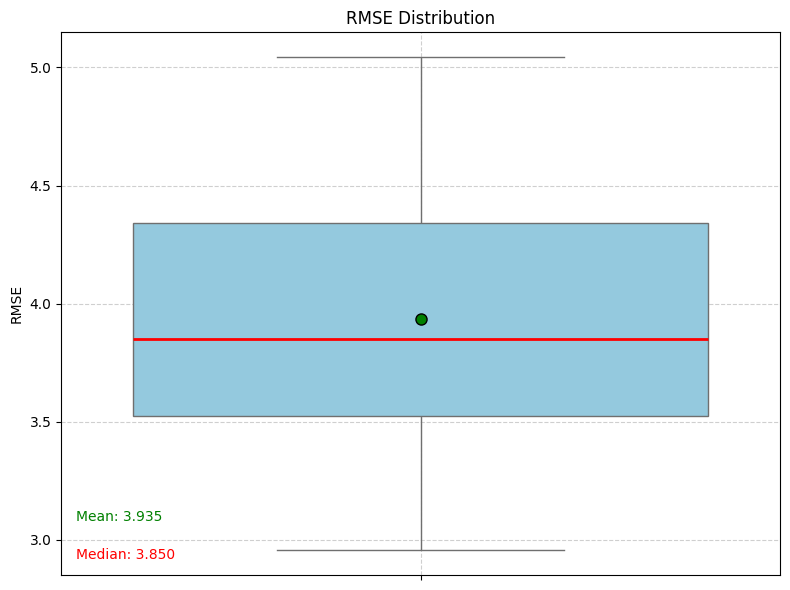

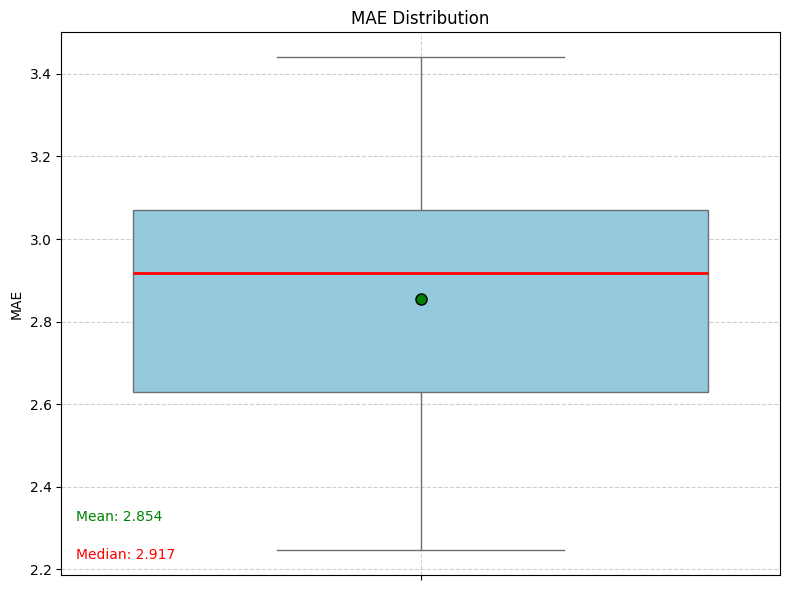

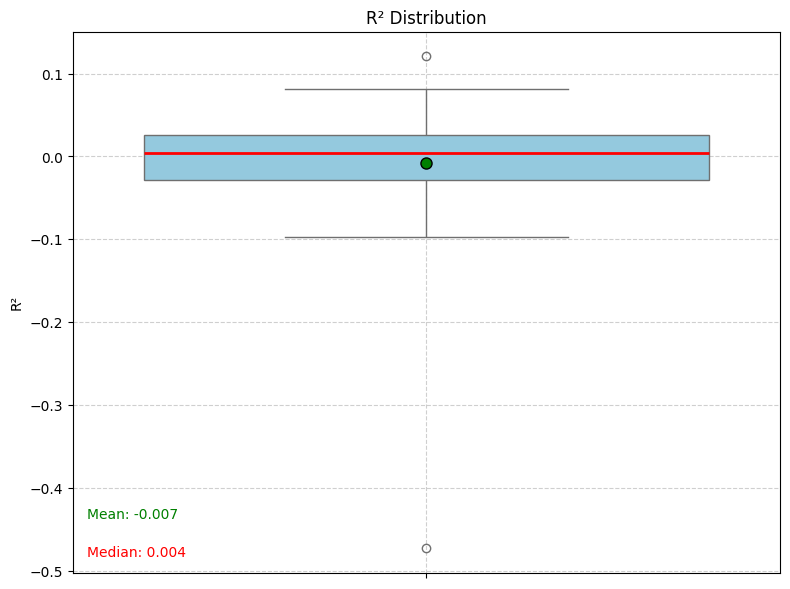

For elastic_net tuning:
Best params for elastic_net: {'alpha': 1.0, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 1000, 'selection': 'random'}
Best RMSE from CV: 4.0538
Evaluation Summary (50 Repeats)
RMSE
  Mean:   3.791
  Median: 3.787
  95% CI: (2.968, 4.702)
MAE
  Mean:   2.672
  Median: 2.723
  95% CI: (2.112, 3.276)
R² Score
  Mean:   0.061
  Median: 0.074
  95% CI: (-0.088, 0.215)


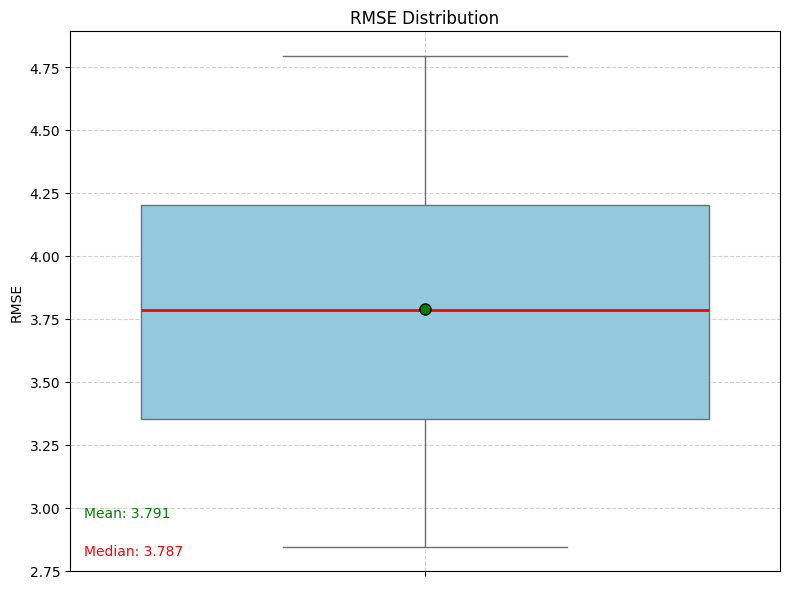

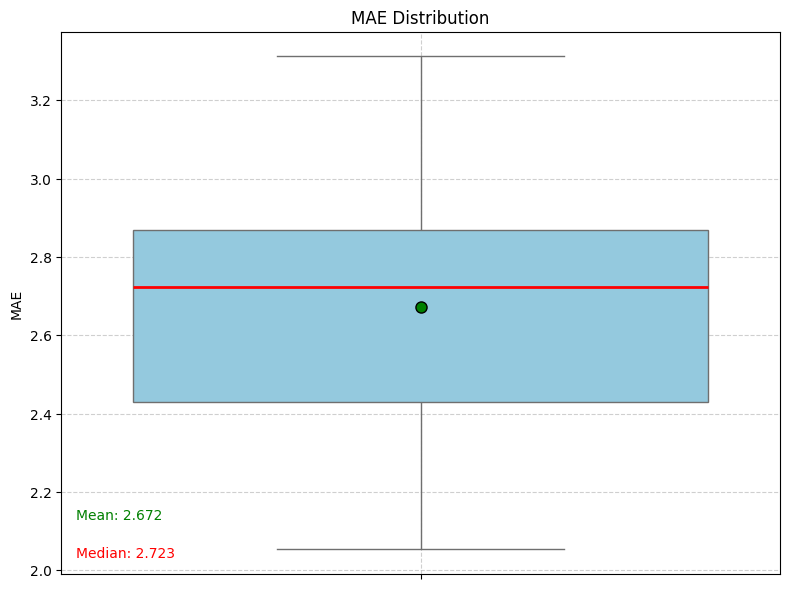

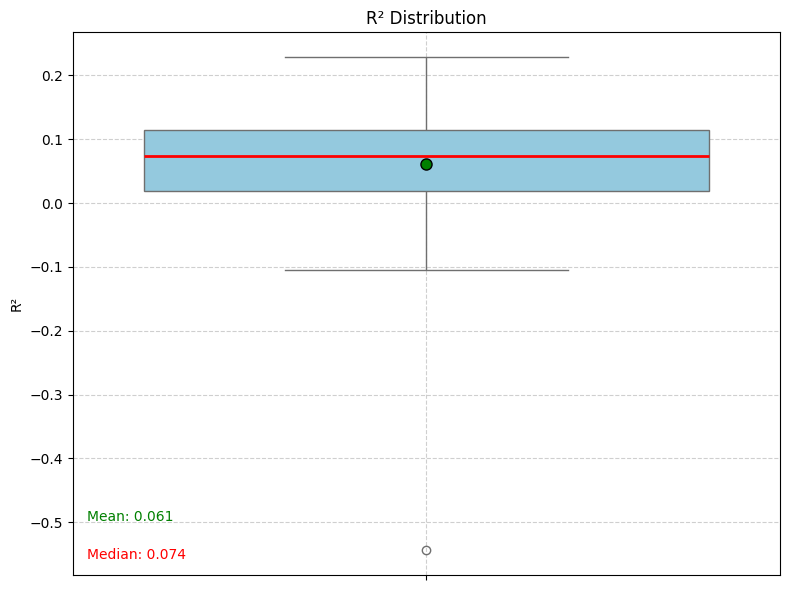

For svr baseline:
Evaluation Summary (50 Repeats)
RMSE
  Mean:   3.810
  Median: 3.827
  95% CI: (2.740, 4.833)
MAE
  Mean:   2.497
  Median: 2.493
  95% CI: (1.900, 3.009)
R² Score
  Mean:   0.062
  Median: 0.056
  95% CI: (-0.070, 0.173)


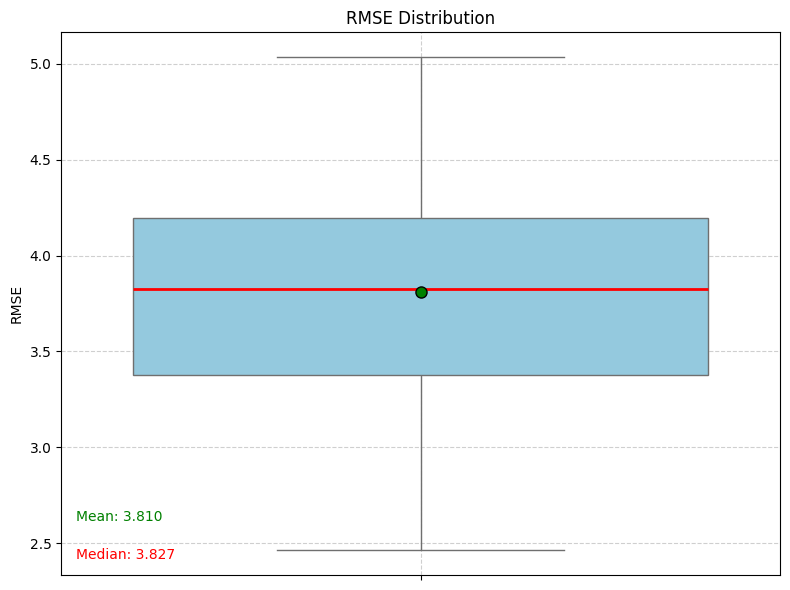

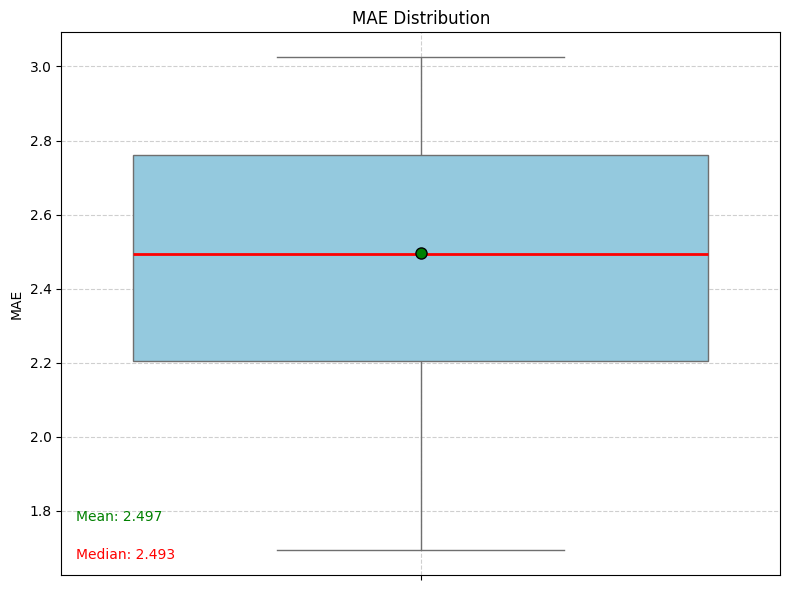

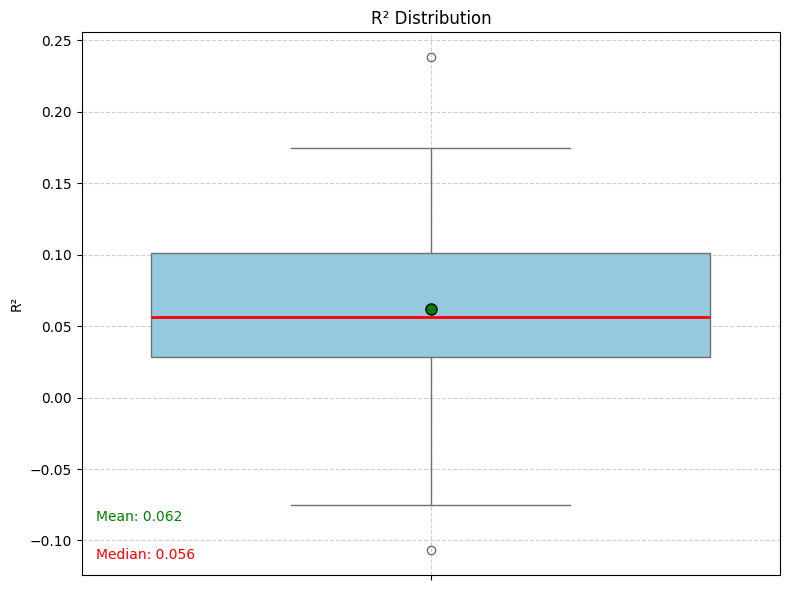

For svr feature_selection:
Evaluation Summary (50 Repeats)
RMSE
  Mean:   3.803
  Median: 3.796
  95% CI: (2.825, 4.808)
MAE
  Mean:   2.481
  Median: 2.448
  95% CI: (1.880, 3.077)
R² Score
  Mean:   0.061
  Median: 0.072
  95% CI: (-0.152, 0.203)


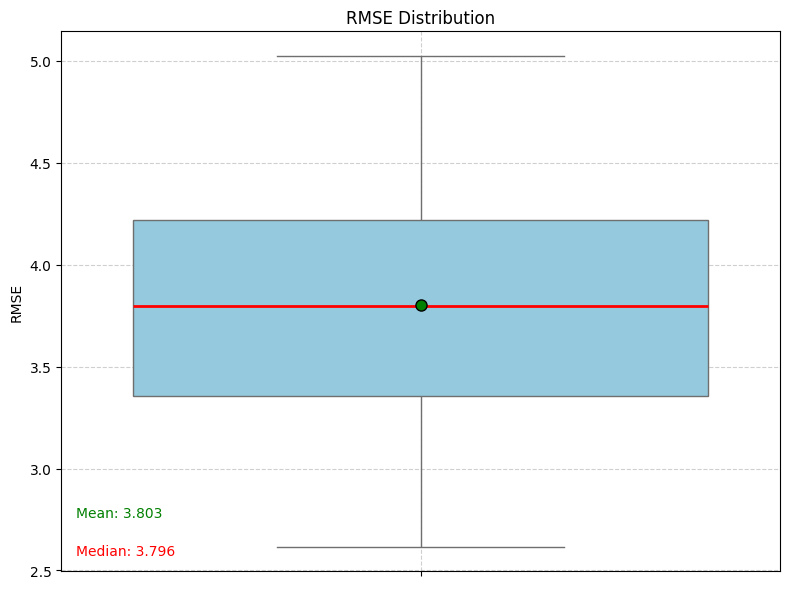

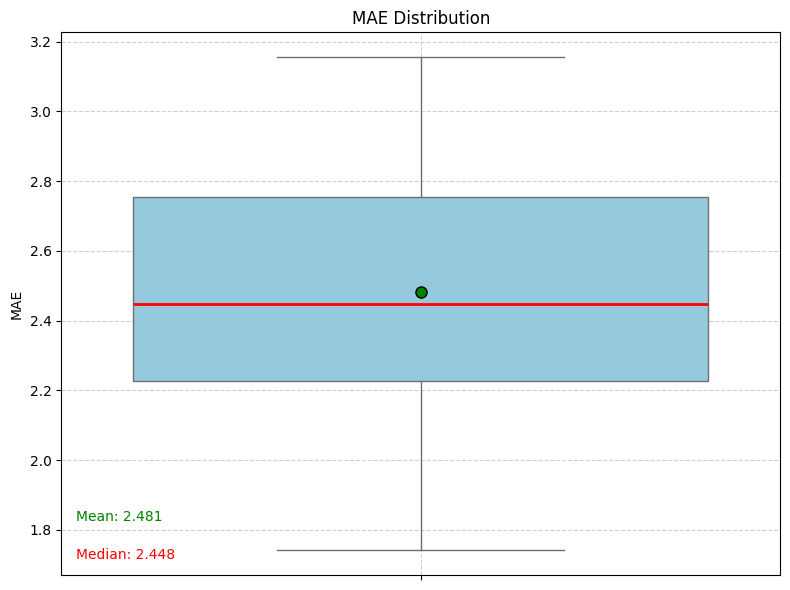

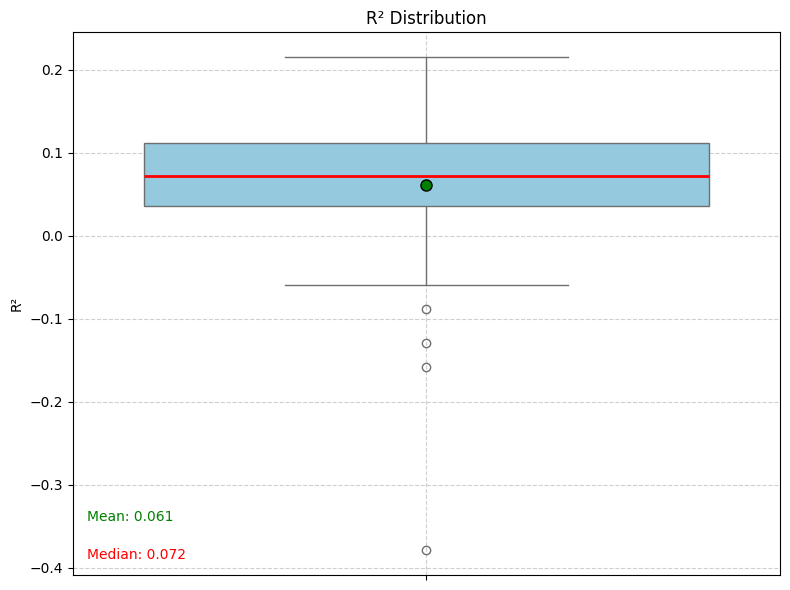

For svr tuning:
Best params for svr: {'C': 0.01, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}
Best RMSE from CV: 4.0123
Evaluation Summary (50 Repeats)
RMSE
  Mean:   3.776
  Median: 3.857
  95% CI: (2.863, 4.632)
MAE
  Mean:   2.539
  Median: 2.567
  95% CI: (1.964, 3.144)
R² Score
  Mean:   0.069
  Median: 0.086
  95% CI: (-0.122, 0.210)


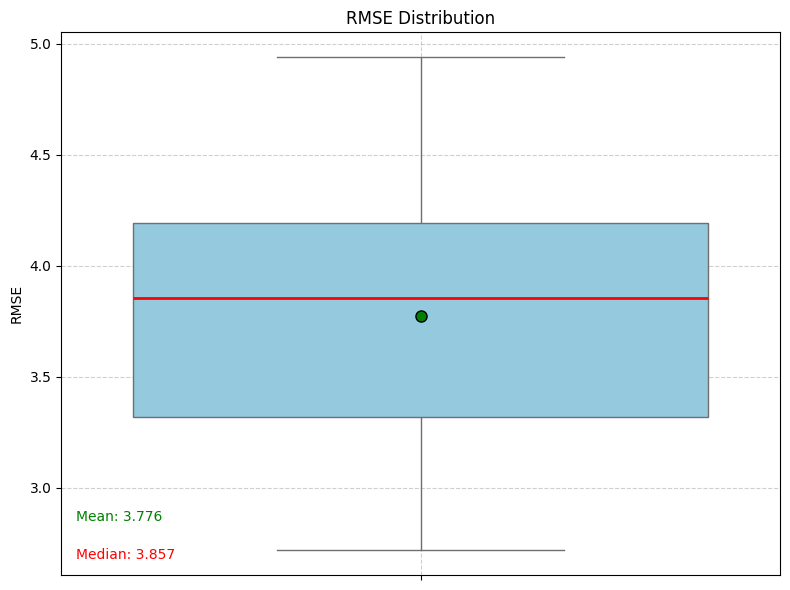

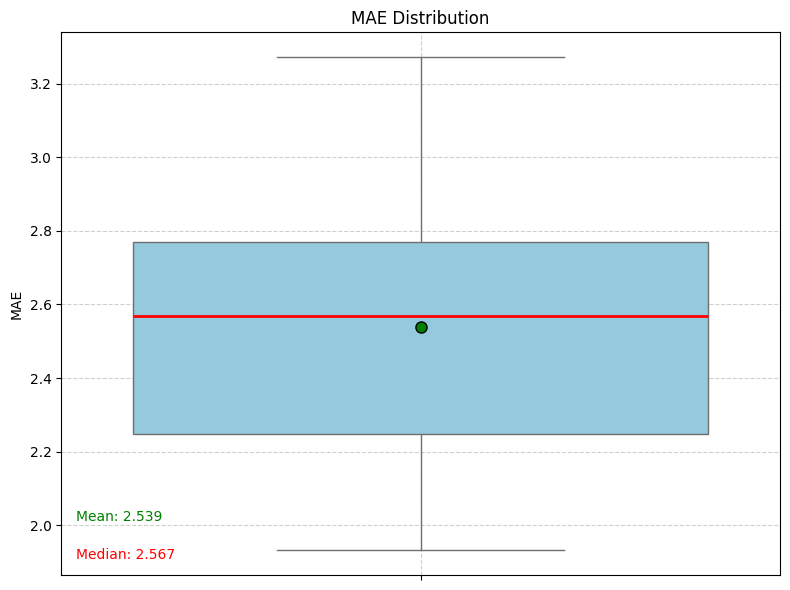

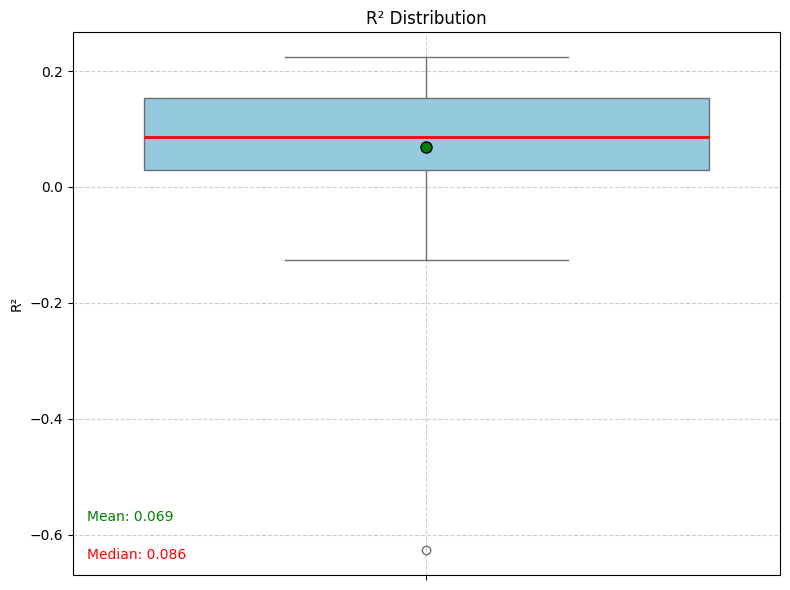

For bayesian_ridge baseline:
Evaluation Summary (50 Repeats)
RMSE
  Mean:   3.712
  Median: 3.700
  95% CI: (2.923, 4.506)
MAE
  Mean:   2.553
  Median: 2.585
  95% CI: (2.065, 3.090)
R² Score
  Mean:   0.099
  Median: 0.116
  95% CI: (-0.091, 0.277)


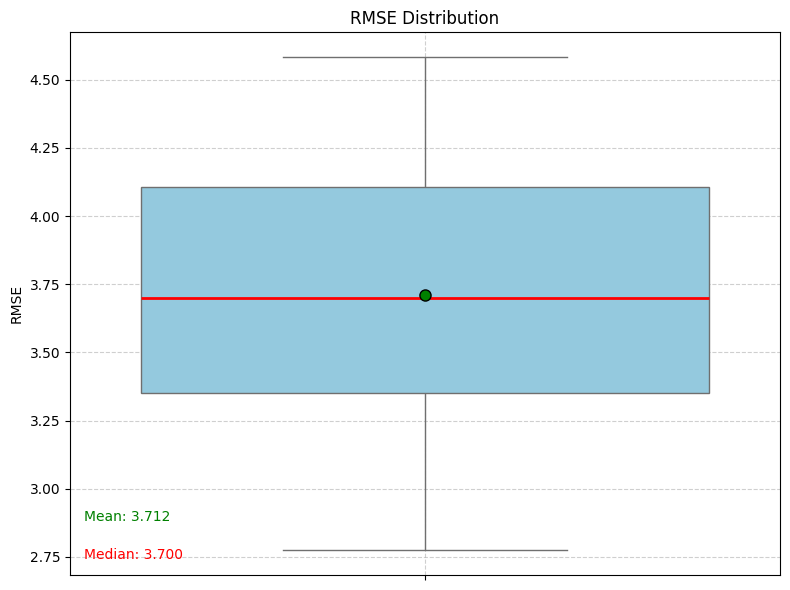

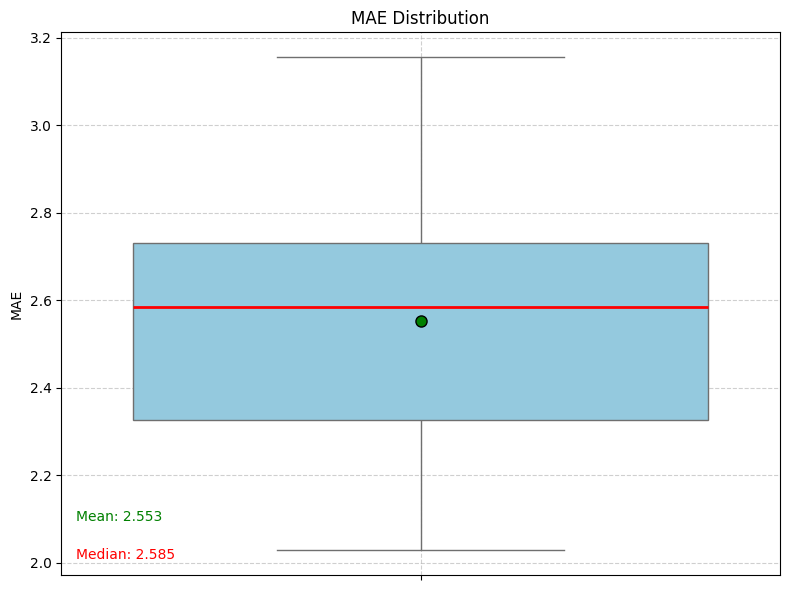

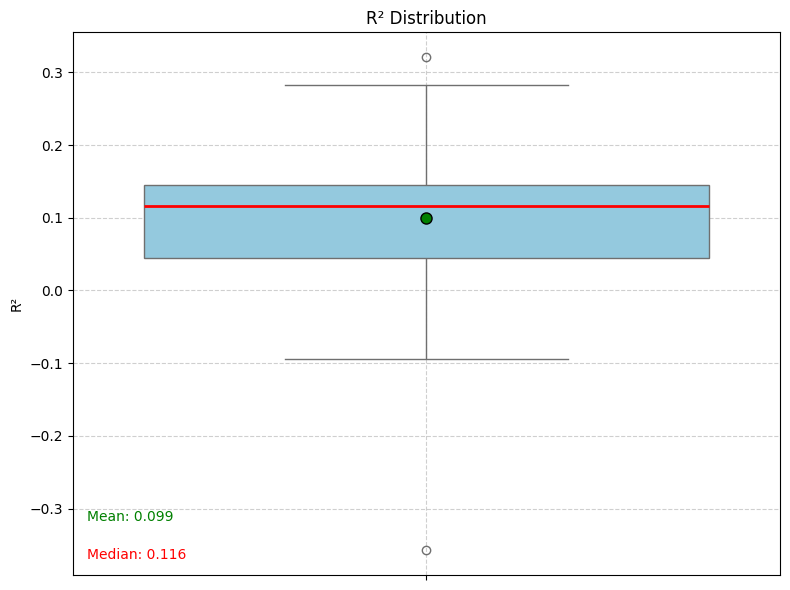

For bayesian_ridge feature_selection:
Evaluation Summary (50 Repeats)
RMSE
  Mean:   3.812
  Median: 3.800
  95% CI: (2.962, 4.647)
MAE
  Mean:   2.645
  Median: 2.640
  95% CI: (2.150, 3.240)
R² Score
  Mean:   0.040
  Median: 0.052
  95% CI: (-0.242, 0.311)


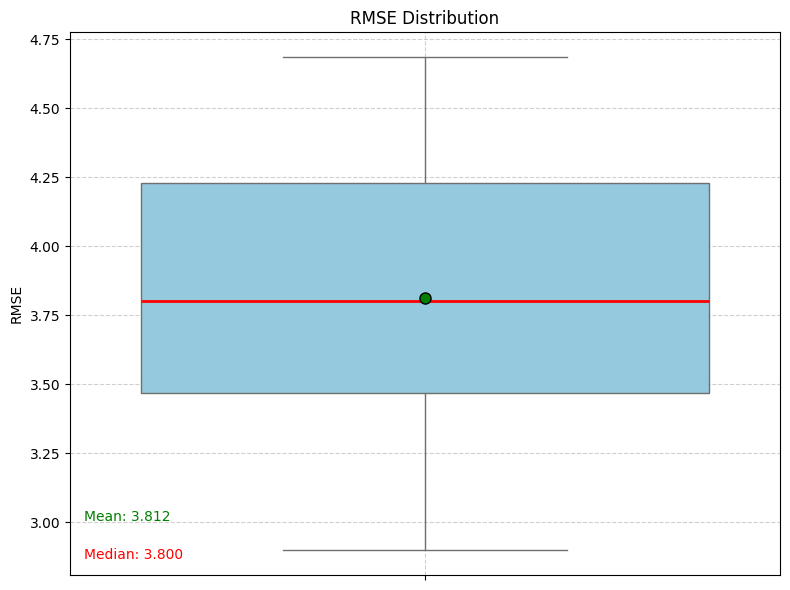

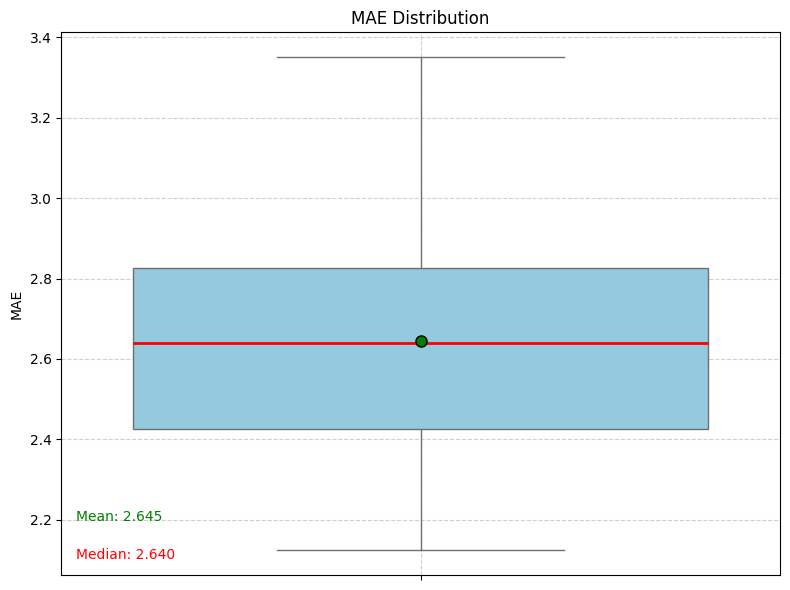

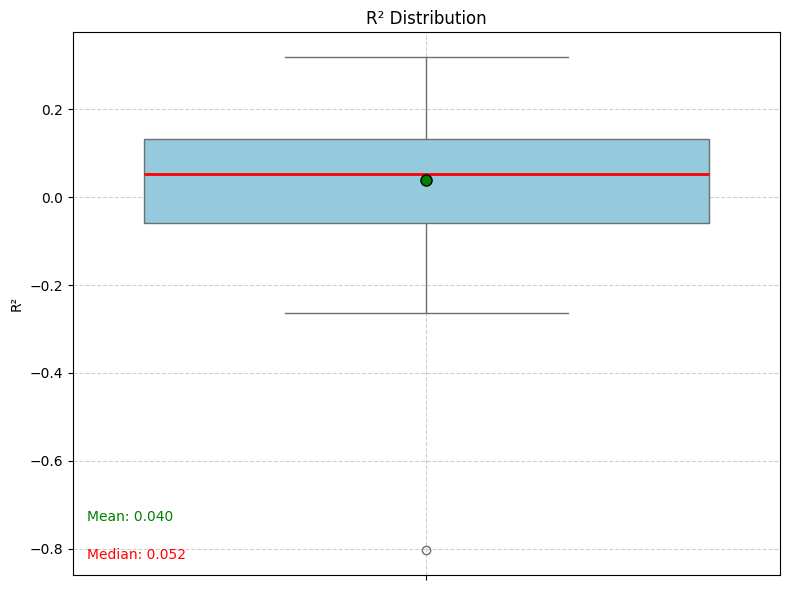

For bayesian_ridge tuning:
Best params for bayesian_ridge: {'alpha_1': 1e-07, 'alpha_2': 1e-05, 'compute_score': True, 'fit_intercept': True, 'lambda_1': 1e-05, 'lambda_2': 1e-07, 'tol': 0.0001}
Best RMSE from CV: 4.1268
Evaluation Summary (50 Repeats)
RMSE
  Mean:   3.812
  Median: 3.800
  95% CI: (2.962, 4.647)
MAE
  Mean:   2.645
  Median: 2.640
  95% CI: (2.150, 3.240)
R² Score
  Mean:   0.040
  Median: 0.052
  95% CI: (-0.242, 0.311)


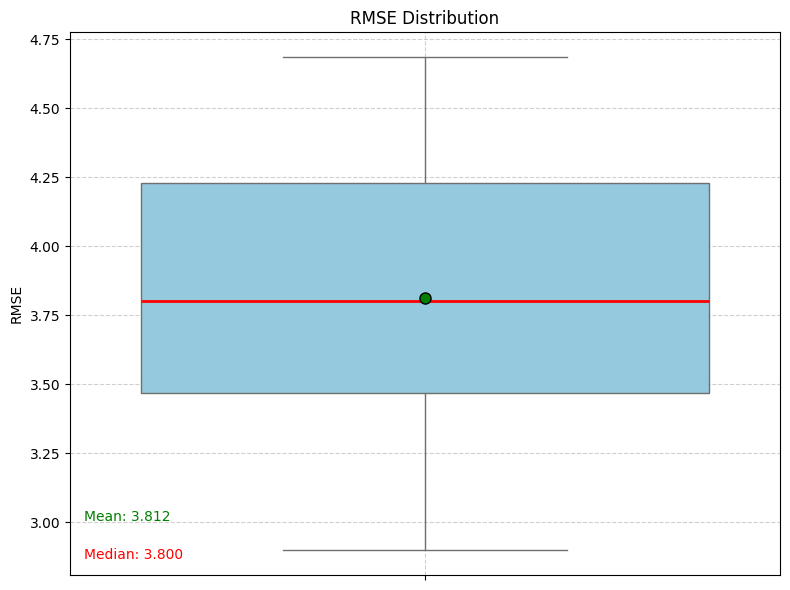

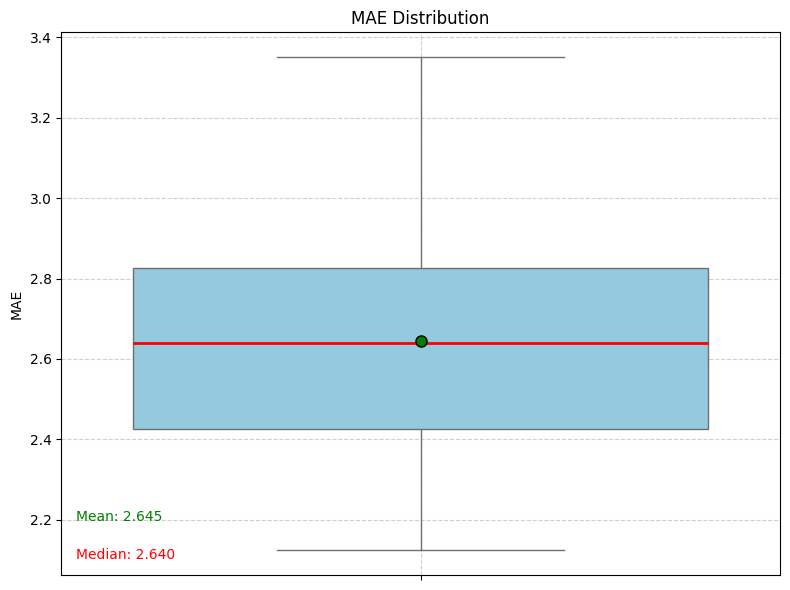

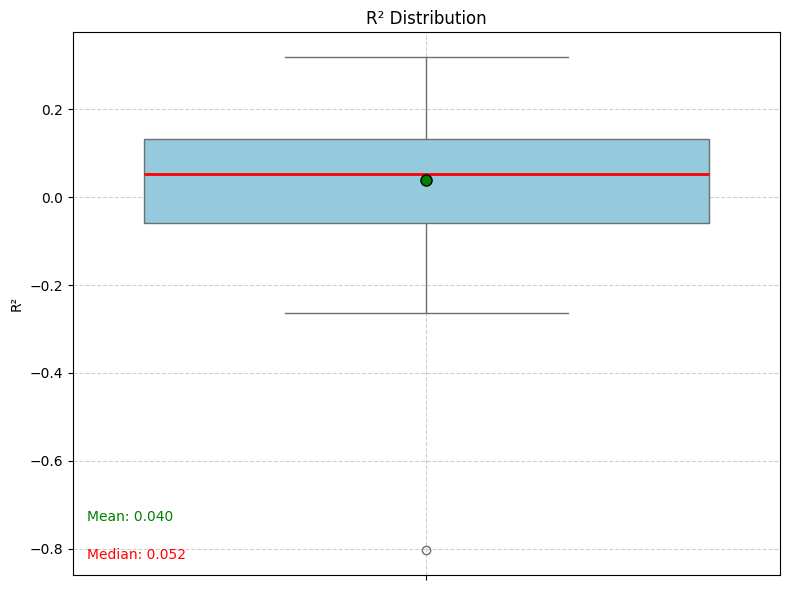

The winner is bayesian_ridge_baseline_best


In [4]:
model_classes = [(ElasticNet, "elastic_net"), (SVR, "svr"), (BayesianRidge, "bayesian_ridge")]
regressor_classes = [(BaselineRegressor, "baseline"), (FeatureSelectionRegressor, "feature_selection"), (TuningRegressor, "tuning")]

best_models = {}

for model_cls, model_name in model_classes:
    stage_results = {}

    for regressor_cls, regressor_name in regressor_classes:
        regressor = regressor_cls(X, y, eval_X.copy(), eval_y.copy(), model_cls(), f"{regressor_name}_{model_name}", model_name)
        print(f'For {model_name} {regressor_name}:')
        regressor.train()
        eval_result = regressor.evaluate()
        regressor.save()

        stage_results[regressor_name] = {
            'rmse_mean': eval_result['RMSE']['mean'],
            'model': regressor,
            'metrics': eval_result
        }

    best_stage = min(stage_results, key=lambda s: stage_results[s]['rmse_mean'])
    best_entry = stage_results[best_stage]

    best_entry["model"].save_dir = "final_models"
    best_entry["model"].model_name = f"{model_name}_{best_stage}_best"
    best_entry["model"].save()

    best_models[model_name] = {
        'rmse': best_entry['rmse_mean'],
        'model': best_entry["model"],
        'stage': best_stage,
        'metrics': best_entry['metrics']
    }

best_overall_key = min(best_models, key=lambda k: best_models[k]['rmse'])
winner_model = best_models[best_overall_key]['model']

print(f'The winner is {winner_model.model_name}')
winner_model.save_dir = "final_models"
winner_model.model_name = "winner"
winner_model.save()


#### Final Training and Evaluation of the winner  model


1. Merge training and evaluation data

In [5]:
X_full = pd.concat([X, eval_X], axis=0)
y_full = pd.concat([y, eval_y], axis=0)

2. Retrain the Best Model on Full Dataset
- We load the previously selected best-performing model.
- We replace its training data with the full dataset (`X_full`, `y_full`).
- We retrain the model using the `.train()` method.
3. Save the finalized model
- We save the retrained final model under the `models/` directory with the name `winner.pkl`.
- We ensure the directory exists before writing the file.

In [9]:
winner_model = joblib.load("../final_models/winner.pkl")
winner_model.X = X_full
winner_model.y = y_full
winner_model.train()
final_model_path = PROJECT_ROOT / "models" / "winner.pkl"
final_model_path.parent.mkdir(parents=True, exist_ok=True)
joblib.dump(winner_model, final_model_path)

['c:\\Users\\Maria Defteraiou\\Desktop\\DSIT_2024\\Spring Semester\\Machine Learning in Computational Biology\\Assignment-1\\models\\winner.pkl']

4. Evauate on unseen data
- `filename_path` is the location of the unseen dataset to be used for the final evaluation.
- `data_preprocessing()` prepares the features and target variables from this file.
- We load the final model.
- We assign the unseen dataset to `eval_X` and `eval_y`.
- We evaluate the model’s performance using `.evaluate()`, providing a final unbiased estimate of generalization performance.

In [ ]:
filename_path = ""  # Path for the unseen data - for professor to test
X,y = data_preprocessing(filename_path)
winner_model = joblib.load("../models/winner.pkl")
winner_model.eval_X = X
winner_model.eval_y = y
winner_model.evaluate()